Autor: **Jakub Brambor**  
Nr indeksu: **151871**  
Źródło danych: Aplikacja **"Kiedy Pojadę"** - dane były gromadzone własnoręcznie  

#**Badanie punktualności transportu miejskiego w Poznaniu**
Poniższy notatnik ma za zadanie zbadać punktualność tramwajów i autobusów w Poznaniu. Pomiary były zbierane poprzez losowe kliknięcie w ikonkę reprezentującą tramwaj lub autobus w aplikacji Kiedy Pojadę. Spisywane były: numer boczny pojazdu, linia, następny przystanek, przystanek końcowy, opóźnienie oraz dzień tygodnia. Za pomocą narzędzi dostępnych w Google Sheets i języka programowania Python, oprócz zmierzonych danych dodałem: Typ pojazdu i model (identyfikowany numerem bocznym - model tylko dla tramwajów), opóźnienie w formacie liczby zmiennoprzecinkowej, opóźnienie w formacie liczby całkowitej i godzina odczytu w formacie liczby całkowitej.   

Celem i motywacją tego badania jest zbadanie jakości i punktualności floty autobusowej i taboru poznańskiego ZTMu. Poddane wątpliwościom zostaną również także efekty głośnych ostatnio remontów (w szczególności na ulicy św.Marcin i na trasie Poznańskiego Szybkiego Tramwaju).
  
  
Załadujmy więc dane i przeprowadźmy analizę eksploracyjną.

In [ ]:
Data <- read.csv("https://raw.githubusercontent.com/august3sas/statystka/main/ZTMparsed.csv",sep=',', colClasses = c("integer", "character", "integer", "integer", "character", "character", "character", "character", "character", "numeric", "numeric", "integer", "character"))
Data

liczba_porzadkowa,rodzaj_pojazdu,nr_boczny,linia,nastepny_przystanek,przystanek_koncowy,opoznienie.przyspieszenie,godzina_odczytu,dzien_tygodnia,opoznienie_f,godzina_i,opoznienie_i,MODEL
<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>
1,TRAMWAJ,423,17,Fredry,Zawady,01:59,14:43,sroda,1.983,14,1,MODERTRANS
2,TRAMWAJ,264,8,Most Teatralny,Gorczyn PKM,00:37,14:44,sroda,0.617,14,0,KONSTAL
3,TRAMWAJ,620,6,Most Dworcowy,Milostowo,-00:51,14:44,sroda,-0.850,14,0,MODERTRANS
4,TRAMWAJ,542,12,Poznan Glowny,Staroleka PKM,00:44,14:45,sroda,0.733,14,0,SOLARIS
5,TRAMWAJ,918,10,Wierzbiecice,Debiec PKM,01:59,14:45,sroda,1.983,14,1,MODERTRANS
6,TRAMWAJ,162,6,Most Dworcowy,Junikowo,01:59,14:46,sroda,1.983,14,1,KONSTAL
7,TRAMWAJ,550,12,AWF,Os.Sobieskiego,03:58,14:46,sroda,3.967,14,3,SOLARIS
8,TRAMWAJ,558,9,Lakowa,Debiec PKM,00:54,14:46,sroda,0.900,14,0,SOLARIS
9,TRAMWAJ,226,7,Rondo Rataje,Polabska,03:23,14:47,sroda,3.383,14,3,MODERTRANS


Powyższa tabela jest próbką o wielkości 1076. Początkowo, sprawdźmy czy tramwaje i autobusy przyjeżdżają punktualnie. Sporządźmy zatem histogram liczby pomiarów od opóźnienia. Przyjrzymy się transportowi w ogóle, a następnie oddzielnie autobusom i tramwajom.

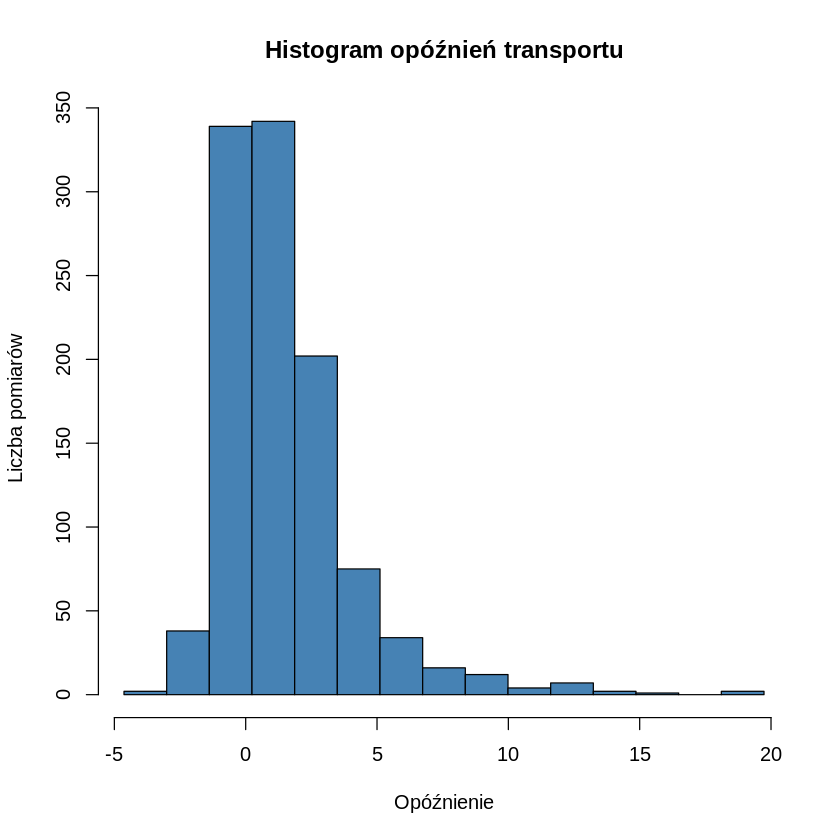

In [ ]:
max_value <- max(Data$opoznienie_f)
min_value <- min(Data$opoznienie_f)
width <- (max_value - min_value) / 15
hist(Data$opoznienie_f, breaks = seq(min_value, max_value, width),
     main = "Histogram opóźnień transportu", xlab = "Opóźnienie", ylab = "Liczba pomiarów", col = "steelblue", border = "black")

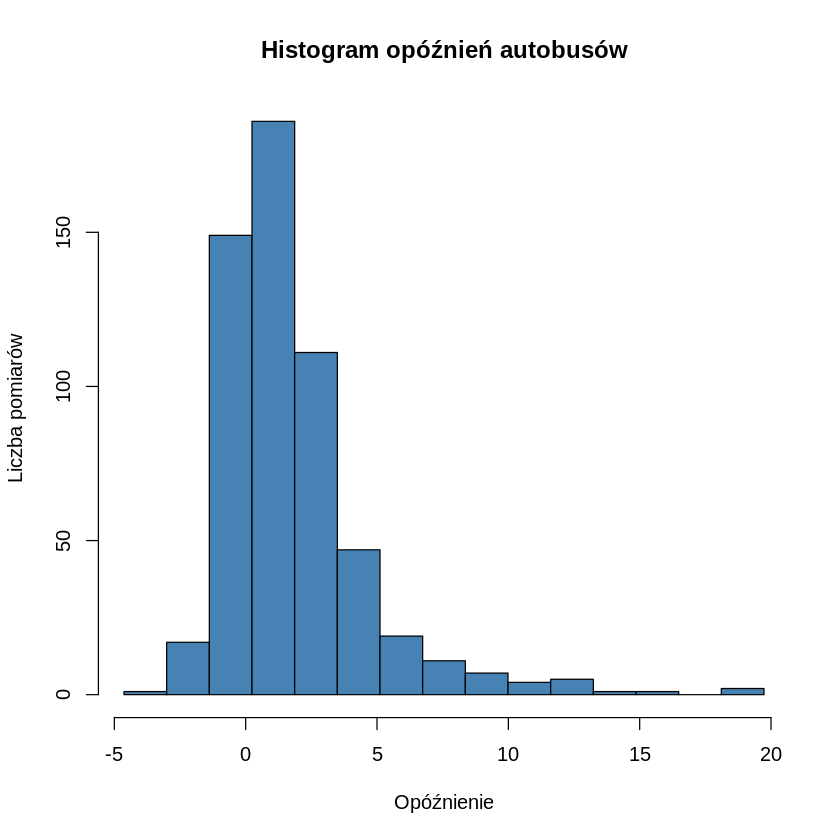

In [ ]:
autobusy <- subset(Data, rodzaj_pojazdu == "AUTOBUS")

max_value1 <- max(Data$opoznienie_f)
min_value1 <- min(Data$opoznienie_f)
width1 <- (max_value1 - min_value1) / 15
hist(autobusy$opoznienie_f, breaks = seq(min_value1, max_value1, width1),
     main = "Histogram opóźnień autobusów", xlab = "Opóźnienie", ylab = "Liczba pomiarów", col = "steelblue", border = "black")


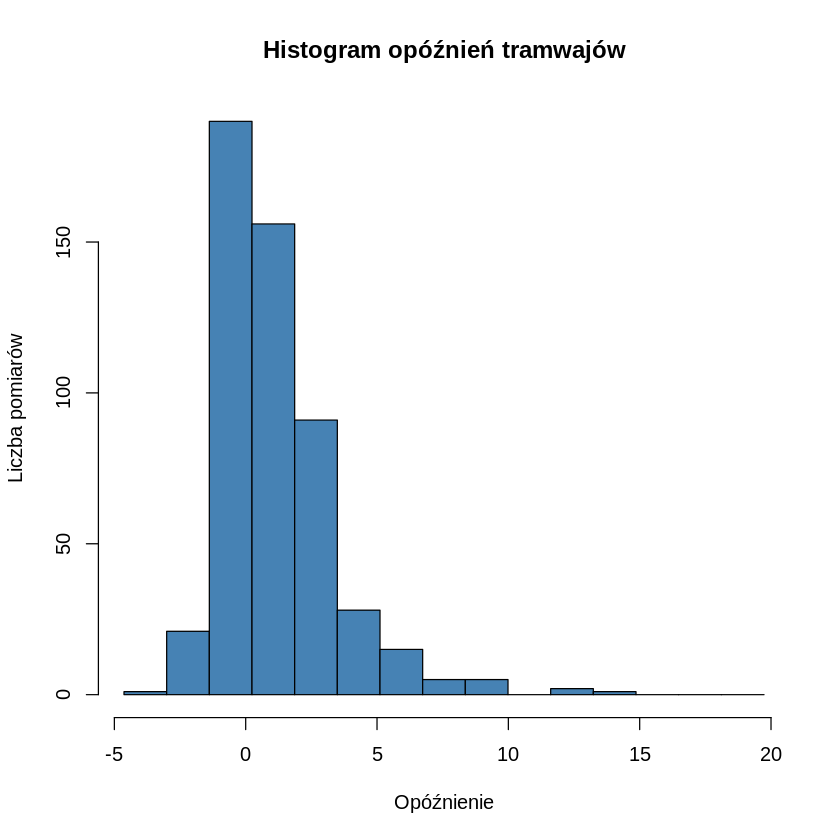

In [ ]:
tramwaje<-subset(Data,rodzaj_pojazdu=="TRAMWAJ")
max_value2 <- max(Data$opoznienie_f)
min_value2 <- min(Data$opoznienie_f)
width2 <- (max_value2 - min_value2) / 15
hist(tramwaje$opoznienie_f,breaks=seq(min_value2,max_value2,width2),main="Histogram opóźnień tramwajów", xlab = "Opóźnienie", ylab = "Liczba pomiarów", col = "steelblue", border = "black")

Jak widać z wykresu, tramwaje przyjeżdżają częściej z opóźnieniem bliższym zera niż autobusy. **Być może jest to spowodowane tym, tramwaje rzadziej stoją w korkach.** Fakt faktem, oprócz rond jest kilka miejsc w Poznaniu, w których tramwaje mogą stać w korkach. Jest to przykładowo most Królowej Jadwigi, na którym często samochody blokują przejazd. Na Winogradach jest również fragment współdzielonej jezdni z tramwajami, jak i prawie wszystkie trasy tramwajowe na Jeżycach (oprócz fragmentu na Roosevelta).  
Autobusy zaś rzadko kiedy mogą korzystać z torowiska. Po wielu remontach w Poznaniu wprowadzono takie miejsca. Przykładowo, jest to torowisko na Królowej Jadwigi (to samo co wspomniane wyżej). Są też takie fragmenty w okolicy Ronda Rataje i Ronda Kaponiera.

#Zbadajmy, czy rozkład opóźnień jest normalny.
Skorzystamy z testu Shapiro-Wilka. Do obliczeń weźmiemy zarówno parametr opóźnienie_f i opóźnienie_i, aby być pewnym naszych obliczeń.

Hipoteza zerowa: Rozkład opóźnień można przybliżyć rozkładem normalnym.

Hipoteza alternatywna: Rozkładu opóźnień nie można przybliżyć rozkładem normalnym.

In [ ]:
normal <- shapiro.test(Data$opoznienie_f)
print(normal)
normal_i <- shapiro.test(Data$opoznienie_i)
print(normal_i)


	Shapiro-Wilk normality test

data:  Data$opoznienie_f
W = 0.82948, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  Data$opoznienie_i
W = 0.72335, p-value < 2.2e-16



#Odrzucamy hipotezę zerową, i przyjmujemy alternatywną.

Będziemy zatem korzystać z testów Wilcoxona, aby sprawdzać, czy pojazdy przyjeżdżają z opóźnieniem równym zero (punktualnie). Korzystać będziemy zazwyczaj z atrybutu opoznienie_f.

Dla dużych próbek skorzystamy z **α = 0.05**, a dla mniejszych skorzystamy z **α = 0.01**

Przeprowadźmy zatem kilka testów statystycznych.  
# Hipoteza zerowa: Tramwaje i autobusy w Poznaniu przyjeżdżają punktualnie.
# Hipoteza alternatywna: Tramwaje i autobusy w Poznaniu nie przyjeżdżają punktualnie.
Aby zbadać prawdziwość hipotezy, uznajmy, że dla przeciętnego Poznaniaka transport miejski przyjeżdża punktualnie, wtedy, kiedy pojazd przyjeżdża w pobliżu minuty podanej na rozkładzie

In [ ]:
alpha<-0.05
n<-nrow(Data)
print(paste("Rozmiar próbki: ",n))
wilcox.test(Data$opoznienie_f,mu=0,alternative="two.sided")


[1] "Rozmiar próbki:  1076"



	Wilcoxon signed rank test with continuity correction

data:  Data$opoznienie_f
V = 476154, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0


Odrzucamy hipotezę zerową. Jak widać, generalna punktualność jest... zła.

#NIESTETY, ZTM w swojej machinie propagandowej próbuje usprawiedliwić notorycznie spóźniające się tramwaje tzw.tolerancją, wg której pojazd uznawany jest za opóźniony, gdy przyjedzie co najmniej 3 minuty po czasie.
My jednak nie usprawiedliwiamy opóźnień. Transport miejski ogółem oblewa cały test (i to jeszcze pierwszy!) w stronę opóźnień.  
Jak mawia klasyk "*szyny były złe, a podwozie też było złe*"  
Nie nastawiajmy się jednak tak negatywnie. Sprawdźmy kilka następnych hipotez i zweryfikujmy, czy w wyszczególnionych niżej okolicznościach transport miejski radzi sobie równie źle.

# Sprawdźmy teraz jak radzi sobie transport miejski w godzinach szczytu.
Próbka będzie brać pod uwagę te pojazdy, które zostały zmierzone w godzinach szczytu w dni robocze. Jak podaje wikipedia, te godziny to godziny między 6 a 9 i między 15 a 17.  
Źródło:https://pl.wikipedia.org/wiki/Godzina_najwi%C4%99kszego_ruchu#:~:text=W%20transporcie%20drogowym%20pod%20tym,mie%C5%9Bcie%20powstaje%20wtedy%20korek%20drogowy

Ponadto, wykreślimy sobie zależność ilości pomiarów od całkowitych minut opóźnienia.

Hipoteza zerowa: Pojazdy przyjeżdżają punktualnie w godzinach szczytu dni roboczych  
Hipoteza alternatywna: Pojazdy nie przyjeżdżają punktualnie w godzinach szczytu dni roboczych



In [ ]:
godziny_szczytu <- subset(Data, godzina_i %in% c(6, 7, 8, 15, 16))
alpha<-0.05
n<-nrow(godziny_szczytu)
print(paste("Rozmiar próbki: ",n))
wilcox.test(godziny_szczytu$opoznienie_f,mu=0,alternative="two.sided")

[1] "Rozmiar próbki:  438"



	Wilcoxon signed rank test with continuity correction

data:  godziny_szczytu$opoznienie_f
V = 84043, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0


##Mimo zawężonego zakresu pomiarów, hipoteza zerowa nadal została odrzucona.
Jeżeli planujemy dojechać punktualnie do miejsca nauki lub pracy, trzeba zostawić sobie kilka minut zapasu. Wizualnie, potwierdza to też wykres.

Mówiąc już o miejscach pracy, musimy wspomnieć o dojazdach. Nie wszyscy mieszkają w Poznaniu, i muszą dojeżdżać np.pociągiem. Zbadajmy więc punktualność przy Dworcu Głównym.  
Pod uwagę brana będzie punktualność na przystankach: Poznań Główny, Most Dworcowy i Dworzec Zachodni.  
Z racji, że zdecydowana większość dojazdów odbywa się w godzinach szczytu, nasza próbka również to uwzględni.


Hipoteza zerowa: Pojazdy przyjeżdżają punktualnie w okolice Dworca Głównego

Hipoteza alternatywna: Pojazdy nie przyjeżdżają punktualnie w okolice Dworca Głównego.


In [ ]:
main_station <- subset(godziny_szczytu, nastepny_przystanek %in% c("Poznan Glowny","Most Dworcowy","Dworzec Zachodni"))
alpha<-0.01
n<-nrow(main_station)
print(paste("Rozmiar próbki: ",n))
wilcox.test(main_station$opoznienie_f,mu=0,alternative="two.sided",conf.level=1-alpha)

[1] "Rozmiar próbki:  22"


Warning message in wilcox.test.default(main_station$opoznienie_f, mu = 0, alternative = "two.sided", :
“cannot compute exact p-value with ties”



	Wilcoxon signed rank test with continuity correction

data:  main_station$opoznienie_f
V = 213, p-value = 0.005232
alternative hypothesis: true location is not equal to 0


##Hipoteza zerowa nadal została odrzucona na rzecz alternatywej  - dworzec główny w Poznaniu ma dojazd, na którym można wątpliwie polegać.
P-wartość jest jednak bliska alfie, więc nie jest aż tak źle jak w pozostałych przypadkach.


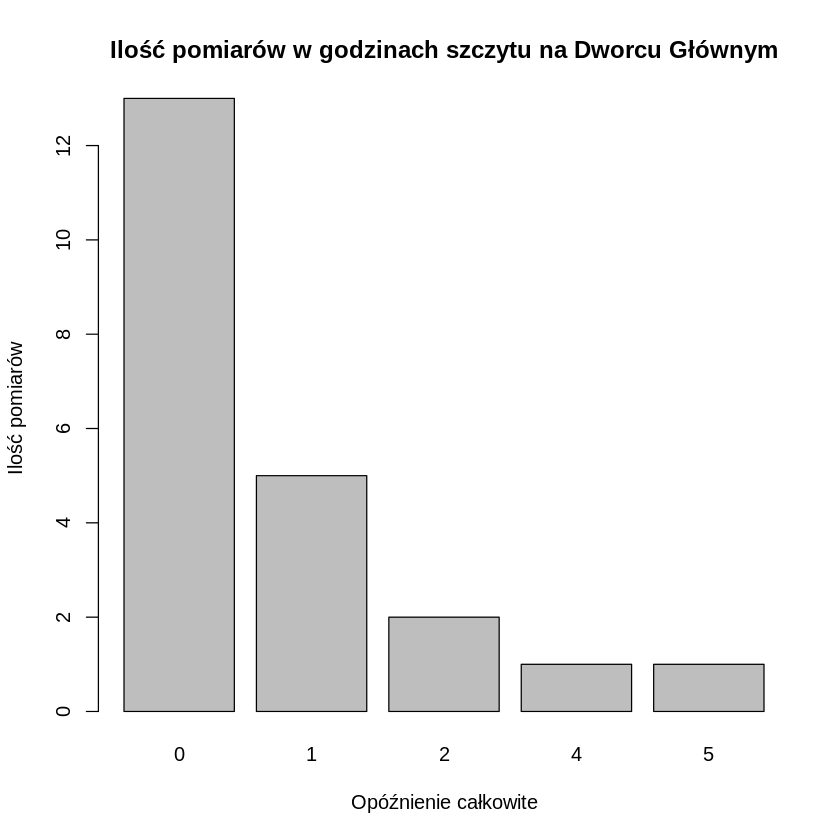

In [ ]:
liczba_pomiarow1 <- table(main_station$opoznienie_i)
barplot(liczba_pomiarow1, main = "Ilość pomiarów w godzinach szczytu na Dworcu Głównym",xlab = "Opóźnienie całkowite",ylab = "Ilość pomiarów")

Jak widać, sporo tramwajów przyjeżdża punktualnie. Ponadto, żaden nie przyjechał znacznie przed czasem. Jednakże jest sporo pomiarów, w których tramwaje się spóźniły - w tym kilka paro-minutowych. Nie wystarczyło to jednak na zdanie testu.

#Sprawdźmy teraz, jak wygląda punktualność przy Politechnice.
Na politechnikę zazwyczaj można dojechać, jadąc na przystanki: Baraniaka, Kórnicka, Politechnika. Jako, że zajęcia na Politechnice odbywają się w różnych porach i różnych dniach, bierzemy pod uwagę wszystkie dni i godziny.

Hipoteza zerowa: Pojazdy przyjeżdżają punktualnie w okolice Politechniki

Hipoteza alternatywna: Pojazdy nie przyjeżdżają punktualnie w okolice Politechniki.


In [ ]:
politechnika<- subset(Data, nastepny_przystanek %in% c("Politechnika","Kornicka","Baraniaka"))
alpha<-0.01
n<-nrow(politechnika)
print(paste("Rozmiar próbki: ",n))
wilcox.test(politechnika$opoznienie_f,mu=0,alternative="two.sided",conf.level=1-alpha)

[1] "Rozmiar próbki:  13"



	Wilcoxon signed rank exact test

data:  politechnika$opoznienie_f
V = 85, p-value = 0.003418
alternative hypothesis: true location is not equal to 0


#Odrzucamy ponownie hipotezę zerową!
Jak widać, nawet na politechnikę sie spóźnimy.

#A co, jeżeli zbadamy punktualność transportu w weekend?
Hipoteza zerowa: Tramwaje i autobusy przyjeżdżają punktualnie w weekend

Hipoteza alternatywna: Tramwaje i autobusy nie przyjeżdżają punktualnie w weekend



In [ ]:
weekend<- subset(Data, dzien_tygodnia %in% c("sobota","niedziela"))
alpha<-0.01
n<-nrow(weekend)
print(paste("Rozmiar próbki: ",n))
wilcox.test(weekend$opoznienie_f,mu=0,alternative="two.sided",conf.level=1-alpha)

[1] "Rozmiar próbki:  130"



	Wilcoxon signed rank test with continuity correction

data:  weekend$opoznienie_f
V = 6066, p-value = 1.068e-05
alternative hypothesis: true location is not equal to 0


#Odrzucamy hipotezę zerową.

W następnym teście spojrzymy tylko na tramwaje. Poznański ZTM w ramach wielu przetargów zmodernizował w znacznym stopniu swoją flotę. Mimo to, nie zrezygnowano z korzystania z starszych tramwajów. Porównajmy zatem punktualność tych najstarszych tramwajów do punktualności tych najnowszych.

W Poznaniu kursuje kilka modelów tramwajów. Możemy je rozdzielić na dwa typy: Te wyprodukowane w XX wieku i te wyprodukowane w XXI.

Do pierwszej grupy należą tramwaje o modelu: "KONSTAL", "DUWAG" i pot."TATRA"

Do drugiej zaś: "SOLARIS", "SIEMENS", "MODERTRANS"

Ku sprostowaniu, tramwaje od modertransu dzielą się na kilka rodzajów:  Alfa, Beta i Gamma. Alfa jest modernizowanym Konstalem, ale przyjmijmy, że z racji modernizacji, jest to tramwaj XXI-wieczny.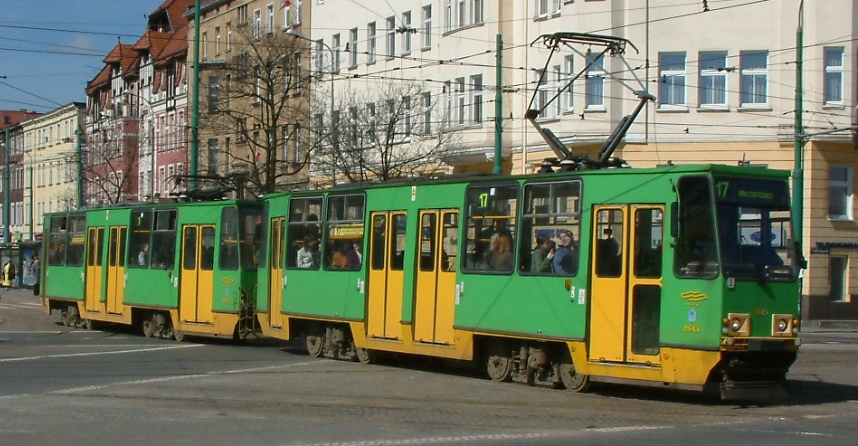

Na zdjęciu: Konstal, tzw "stopiątka".
Źródło:https://pl.wikipedia.org/wiki/Konstal_105NaD

W tym teście porównamy dwie próbki: Próbkę "stare"- zawierająca tramwaje starsze, i "nowe" - zawierająca tramwaje nowsze.

Hipoteza zerowa: Punktualność tramwajów starszych się nie różni od tramwajów nowszych (wartość centralna dla tramwajów starszych jest równa tyle samo. co wartość centralna dla tramwajów nowszych).

Hipoteza alternatywna: Punktualność tramwajów starszych jest gorsza (spóźniają się częściej) od tramwajów nowszych (wartość centralna dla tramwajów starszych jest większa niż wartość centralna dla tramwajów nowszych).

#Wykonamy test U Manna-Whitneya



In [ ]:
alpha<-0.01
stare<-subset(Data, MODEL %in% c("KONSTAL","TATRA","DUWAG"))
nowe<- subset(Data, MODEL %in% c("SOLARIS","SIEMENS","MODERTRANS"))
wilcox.test(stare$opoznienie_f,nowe$opoznienie_f,alternative="greater",conf.level=1-alpha)


	Wilcoxon rank sum test with continuity correction

data:  stare$opoznienie_f and nowe$opoznienie_f
W = 18444, p-value = 0.0003304
alternative hypothesis: true location shift is greater than 0


#Otóż tak - starsze tramwaje spóźniają się bardziej niż te nowe. Odrzucamy hipotezę zerową i przyjmujemy alternatywną.


#A czy pojazdy przyjeżdżają punktualnie na swój przystanek końcowy, czy raczej przyjeżdżają opóźnione?
Przetestujemy to, wyodrębniając te pojazdy, które zostały zmierzone na ostatnim przystanku trasy ("przystanek_koncowy" jest taki sam jak "nastepny_przystanek").
W tym przypadku skorzystamy z testu jednostronnego - gdyż na końcowym przystanku nikt nie wsiada dalej w trasę, więc przyspieszenie jest wybaczalne.

##Hipoteza zerowa: Pojadzy przyjeżdżają punktualnie na przystanek końcowy.
##Hipoteza alternatywna: Pojazdy przyjeżdżają opóźnione na przystanek końcowy.

In [ ]:
ostatni_przystanek <- Data[Data$przystanek_koncowy == Data$nastepny_przystanek, ]
alpha<-0.01
wilcox.test(ostatni_przystanek$opoznienie_f,alternative="greater",conf.level=1-alpha)


	Wilcoxon signed rank test with continuity correction

data:  ostatni_przystanek$opoznienie_f
V = 1374.5, p-value = 6.804e-06
alternative hypothesis: true location is greater than 0


#Odrzucamy hipotezę zerową i przyjmujemy alternatywną.
Źle to świadczy, w szczególności że często przystankami końcowymi są stacje kolejowe (Górczyn PKM, Dębiec PKM, Starołęka PKM...), co może negatywnie wpłynąć na przesiadki. Czasami jednak PKP idzie często w parze z ZTM-em i pociąg też przyjedzie spóźniony...

#Sprawdźmy teraz efektywność remontów.
W Poznaniu 13 maja oddano kilka świeżo wyremontowanych tras. Przyjrzymy się dwóm z nich: Fragmentu od Alei Marcinkowskiego w stronę Ronda Kaponiera i trasy PST w kierunku południowym.
Brane pod uwagę będą pomiary tylko na tych trasach i w tych kierunkach, gdyż tylko wtedy jesteśmy w stanie stwierdzić czy remont jest efektywny, czy nie (opóźnienie tramwaju w takiej sytuacji może być nabite tylko i wyłącznie na remontowanej trasie). Skorzystamy z testu jednostronnego, gdyż badamy skuteczność remontu - przyspieszenie tramwaju świadczy tylko o nim dobrze.

#Hipoteza zerowa: Tramwaje na wyremontowanych trasach przyjeżdżają punktualnie.
#Hipoteza alternatywna: Tramwaje na wyremontowanych trasach przyjeżdżają opóźnione.

In [ ]:
przystanki_15_16S <- c("Szymanowskiego", "Kurpinskiego", "Lechicka Poznan Plaza", "Aleje Solidarnosci", "Slowianska", "Most Teatralny")
przystanki_12_14S <- c("Szymanowskiego", "Kurpinskiego", "Lechicka Poznan Plaza", "Aleje Solidarnosci", "Slowianska", "Most Teatralny", "Rondo Kaponiera", "Dworzec Zachodni")
przystanki_16N <- c("Ratajczaka", "Zamek", "Rondo Kaponiera")
remont <- subset(Data, (linia %in% c("15", "16") & przystanek_koncowy != "Os.Sobieskiego" & nastepny_przystanek %in% przystanki_15_16S) |
                      (linia %in% c("12", "14") & przystanek_koncowy != "Os.Sobieskiego" & nastepny_przystanek %in% przystanki_12_14S) |
                      (linia == "16" & przystanek_koncowy == "Os.Sobieskiego" & nastepny_przystanek %in% przystanki_16N))
alpha<-0.01
wilcox.test(remont$opoznienie_f,alternative="greater",conf.level=1-alpha)


Warning message in wilcox.test.default(remont$opoznienie_f, alternative = "greater", :
“cannot compute exact p-value with ties”



	Wilcoxon signed rank test with continuity correction

data:  remont$opoznienie_f
V = 380.5, p-value = 0.7436
alternative hypothesis: true location is greater than 0


#Okazuje się, że remonty są widocznie bardzo efektywne.

Taki wynik statystyki może być spowodowany paroma czynnikami, a głównym z nich jest to, że remonty widocznie działają.


#Czy istnieje zależność między godziną pomiaru a opóźnieniem pojazdu?

Wykorzystamy do tego regresję liniową.


Call:
lm(formula = opoznienie_f ~ godzina_f, data = Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0563 -1.6173 -0.5813  0.8234 18.2586 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.86419    0.35406   5.265 1.69e-07 ***
godzina_f   -0.02304    0.02136  -1.079    0.281    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.557 on 1074 degrees of freedom
Multiple R-squared:  0.001082,	Adjusted R-squared:  0.0001521 
F-statistic: 1.164 on 1 and 1074 DF,  p-value: 0.281


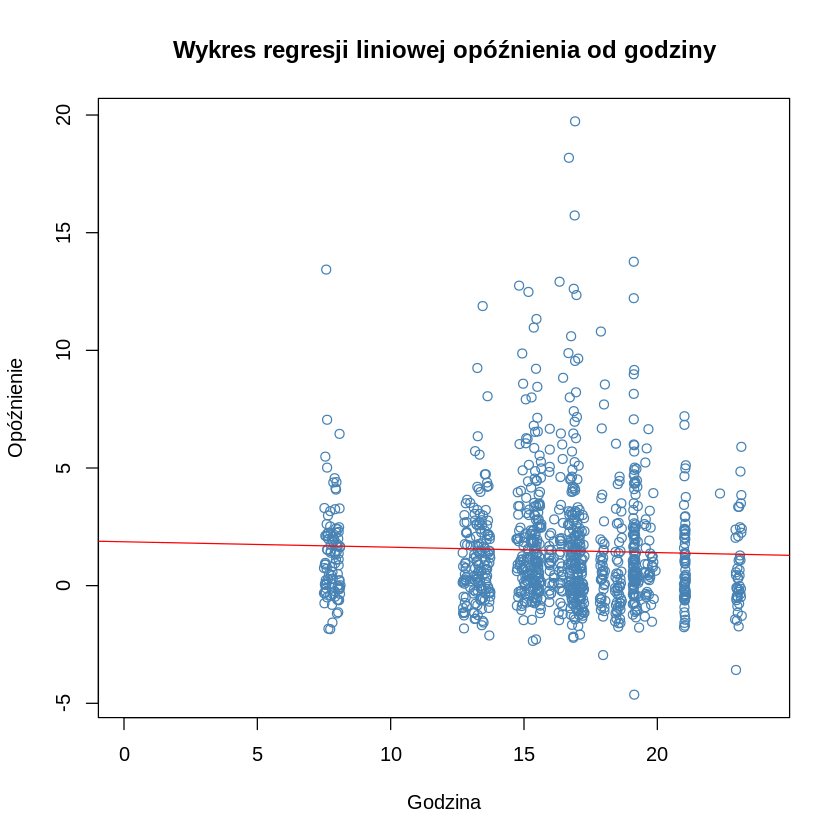

In [ ]:
godzina_f <- as.numeric(substring(Data$godzina_odczytu, 1, 2)) + as.numeric(substring(Data$godzina_odczytu, 4, 5)) / 60
model <- lm(opoznienie_f ~ godzina_f, data = Data)

plot(godzina_f, Data$opoznienie_f, xlim = c(0, 24), ylim = c(min(Data$opoznienie_f), max(Data$opoznienie_f)),
     main = "Wykres regresji liniowej opóźnienia od godziny", xlab = "Godzina", ylab = "Opóźnienie", col = "steelblue")
abline(model, col = "red")

summary(model)


#Jak widać, nie ma między tymi dwoma zmiennymi zależności liniowej.

Konkludując, transport miejski w Poznaniu ma swoje uroki, i jednym z nich jest jego częsty brak punktualności. Jeżeli spojrzymy jednak na węższy zakres i zbadamy wybrane rejony Poznania, to nie jest tak źle.

Jeżeli komuś naprawdę zależy na punktualności i jest zdrowy, polecam wybrać rower - wtedy jedyne opóźnienie generować mogą światła drogowe i zdarzenia losowe, natomiast jeśli parę minut opóźnienia nie robi komuś różnicy - warto korzystać z transportu miejskiego.

In [ ]:
# Sortowanie danych względem opóźnienia_i
Data_sorted <- Data[order(abs(Data$linia)), ]

# Wykresy histogramów dla każdej linii
linie_unikalne <- unique(Data$linia)

for (linia in linie_unikalne) {
  dane_linii <- Data_sorted[Data_sorted$linia == linia, ]

  # Stworzenie nazwy dla wykresu
  nazwa_wykresu <- ifelse(grepl("AUTOBUS", linia), paste("Autobus Linia", linia), paste("Tramwaj Linia", linia))

  # Wykres histogramu
  hist(dane_linii$opoznienie_i, main = nazwa_wykresu, xlab = "Opóźnienie_i", ylab = "Liczba pojazdów", col = "steelblue", border = "black")
}

In [ ]:
# Sortowanie danych względem opóźnienia_i
Data_sorted <- Data[order(abs(Data$opoznienie_i)), ]

# Wykresy histogramów dla każdej linii tramwajowej
tramwaje <- subset(Data_sorted, rodzaj_pojazdu == "TRAMWAJ")

linie_unikalne_tramwaje <- unique(tramwaje$linia)

for (linia in linie_unikalne_tramwaje) {
  dane_linii <- subset(tramwaje, tramwaje$linia == linia)

  # Stworzenie nazwy dla wykresu
  nazwa_wykresu <- paste("Tramwaj Linia", linia)

  # Wykres histogramu
  hist(dane_linii$opoznienie_i, main = nazwa_wykresu, xlab = "Opóźnienie_i", ylab = "Liczba pojazdów", col = "steelblue", border = "black")
}

In [ ]:
# Ograniczenie danych tylko do tramwajów
tramwaje <- subset(Data, rodzaj_pojazdu == "TRAMWAJ")

# Grupowanie danych i obliczanie statystyk dla każdej linii tramwajowej
tabela_statystyk <- aggregate(opoznienie_f ~ linia, data = tramwaje,
                             FUN = function(x) c(Srednia = mean(x), Odchylenie = sd(x), Mediana = median(x)))

# Wyświetlenie tabeli
print(tabela_statystyk)

   linia opoznienie_f.Srednia opoznienie_f.Odchylenie opoznienie_f.Mediana
1      1            1.7886429               2.6961436            1.0585000
2      2            0.7227273               2.0675133            0.4835000
3      3            0.8420800               1.7819834            0.3830000
4      5            2.1774348               2.6721204            1.8670000
5      6            1.1352400               2.1101558            0.5165000
6      7            1.7699512               3.3736218            0.5000000
7      8            1.3615000               1.5744433            0.9170000
8      9            0.7770000               1.8116673            0.3915000
9     10            0.4229583               1.7170590            0.3000000
10    11            0.8377097               1.4099008            0.5170000
11    12            0.7062812               1.5756214            0.3080000
12    13            1.6666304               2.4691294            1.1000000
13    14            0.504

In [ ]:
# Ograniczenie danych tylko do tramwajów
tramwaje <- subset(Data, rodzaj_pojazdu == "AUTOBUS")

# Grupowanie danych i obliczanie statystyk dla każdej linii tramwajowej
tabela_statystyk <- aggregate(opoznienie_f ~ linia, data = tramwaje,
                             FUN = function(x) c(Srednia = mean(x), Odchylenie = sd(x), Mediana = median(x)))

# Wyświetlenie tabeli
print(tabela_statystyk)

   linia opoznienie_f.Srednia opoznienie_f.Odchylenie opoznienie_f.Mediana
1    121           0.11680000              1.15332615          -0.33300000
2    124           0.91650000              0.04737615           0.91650000
3    145           1.06866667              1.04734307           1.76700000
4    146           0.39350000              1.42588298           0.35800000
5    148           1.39042857              2.08193435           1.85000000
6    149           0.66400000              0.73375473           0.74200000
7    152           1.70095000              1.75919083           1.71700000
8    154           1.07881818              2.14096912           0.85000000
9    156           1.38550000              1.59811827           1.17500000
10   157           0.22500000              1.21966494           0.05000000
11   158           0.18571429              0.71066019           0.03300000
12   159           1.71791667              2.68411101           1.16650000
13   160           2.3012